<a href="https://colab.research.google.com/github/israelklink/Financas_Descentralizadas_Python/blob/main/AAVE_Taxa_de_Juros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ------------------------------------------------------------
# Simulador de Taxas de Juros da Aave (Modelo Variável)
# Autor: Israel Junior (adaptado para Python)
# ------------------------------------------------------------

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline




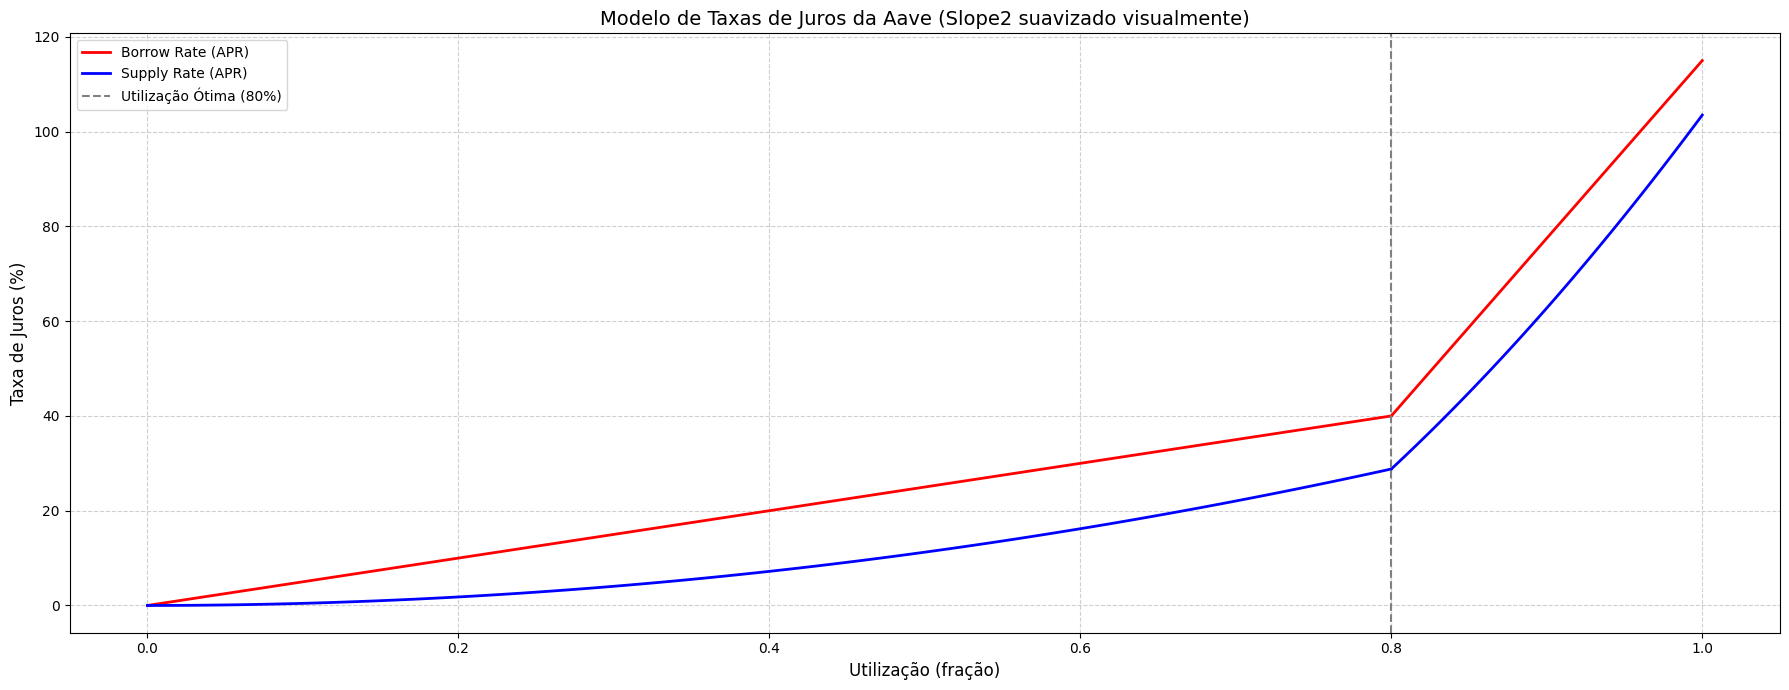

In [15]:
def aave_rates(utilization, optimal=0.80, base=0.00, slope1=0.4, slope2=0.75, reserve_factor=0.10):
    """
    Modelo original da Aave.
    """
    U = utilization
    if U <= optimal:
        borrow_rate = base + (U / optimal) * slope1
    else:
        borrow_rate = base + slope1 + ((U - optimal) / (1 - optimal)) * slope2

    supply_rate = borrow_rate * U * (1 - reserve_factor)
    return borrow_rate, supply_rate


if __name__ == "__main__":
    utilizacoes = np.linspace(0, 1, 101)
    borrow_rates = []
    supply_rates = []

    for u in utilizacoes:
        br, sr = aave_rates(u)
        borrow_rates.append(br * 100)
        supply_rates.append(sr * 100)

    # --- Suavização apenas na parte pós-ótima ---
    U_opt = 0.80
    mask_pos_opt = utilizacoes >= U_opt
    u_pos_opt = utilizacoes[mask_pos_opt]
    br_pos_opt = np.array(borrow_rates)[mask_pos_opt]
    sr_pos_opt = np.array(supply_rates)[mask_pos_opt]

    # Suavização visual
    u_smooth = np.linspace(u_pos_opt.min(), u_pos_opt.max(), 100)
    br_smooth = make_interp_spline(u_pos_opt, br_pos_opt, k=3)(u_smooth)
    sr_smooth = make_interp_spline(u_pos_opt, sr_pos_opt, k=3)(u_smooth)

    # --- Plot ---
    plt.figure(figsize=(18, 7))

    # Antes do ótimo = linha reta
    plt.plot(utilizacoes[utilizacoes <= U_opt],
             np.array(borrow_rates)[utilizacoes <= U_opt],
             color="red", linewidth=2, label="Borrow Rate (APR)")

    plt.plot(utilizacoes[utilizacoes <= U_opt],
             np.array(supply_rates)[utilizacoes <= U_opt],
             color="blue", linewidth=2, label="Supply Rate (APR)")

    # Depois do ótimo = curva suavizada
    plt.plot(u_smooth, br_smooth, color="red", linewidth=2)
    plt.plot(u_smooth, sr_smooth, color="blue", linewidth=2)

    plt.axvline(U_opt, color="gray", linestyle="--", label="Utilização Ótima (80%)")

    plt.title("Modelo de Taxas de Juros da Aave (Slope2 suavizado visualmente)", fontsize=14)
    plt.xlabel("Utilização (fração)", fontsize=12)
    plt.ylabel("Taxa de Juros (%)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()